Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


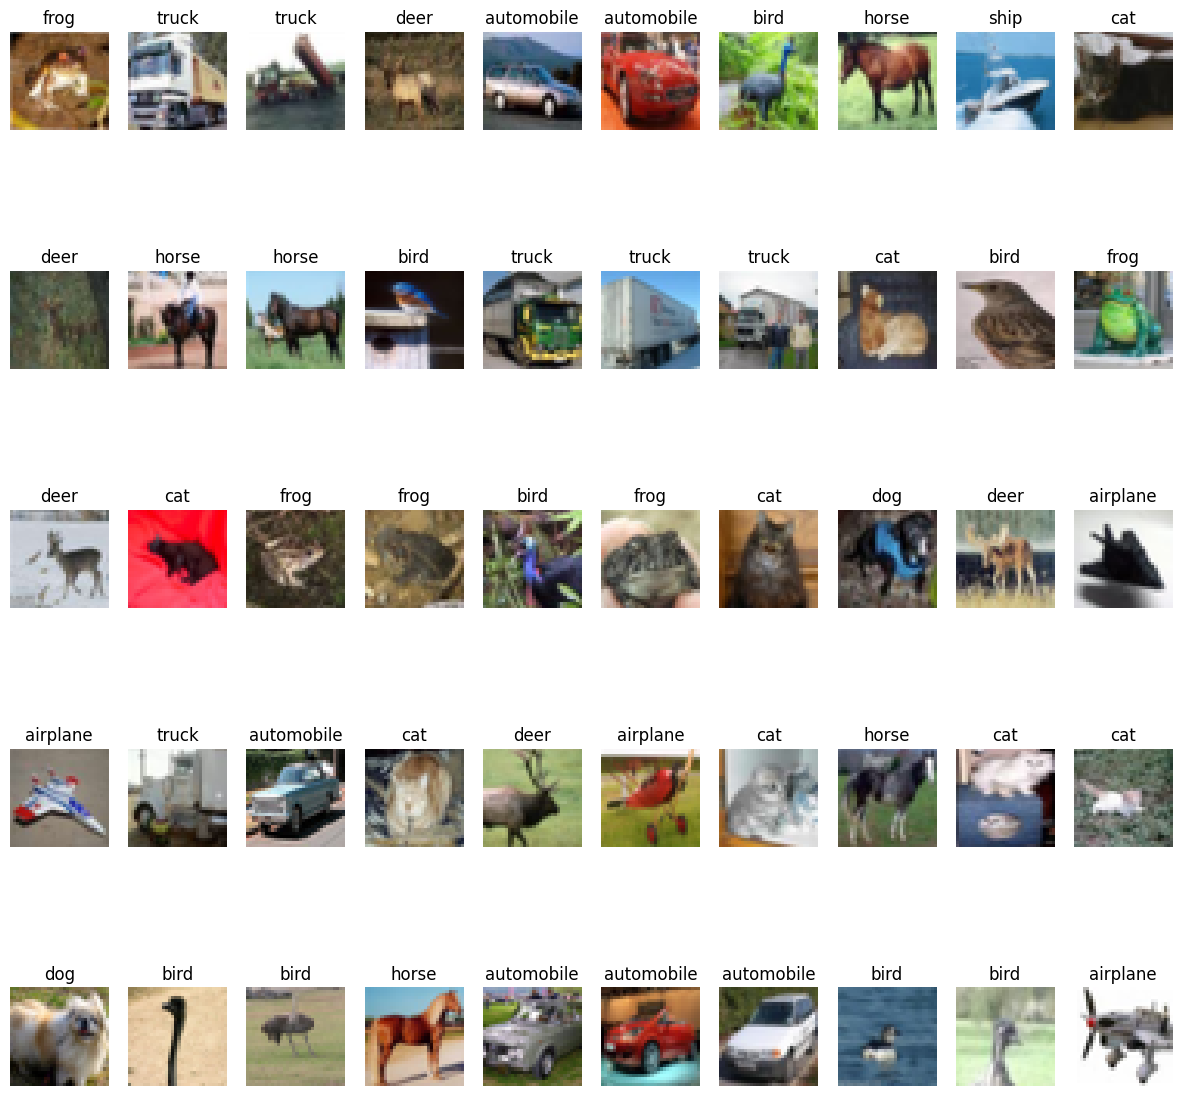

<Figure size 640x480 with 0 Axes>

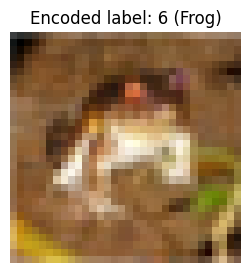

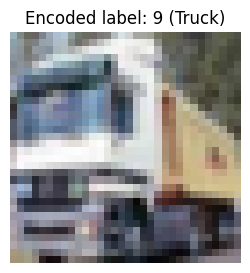

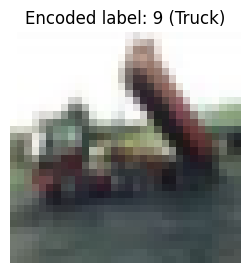

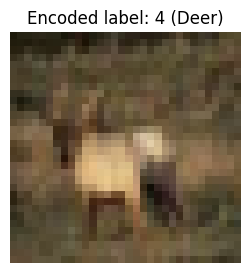

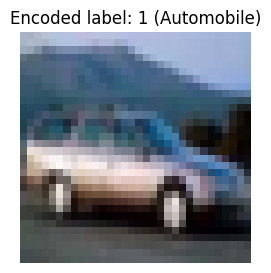

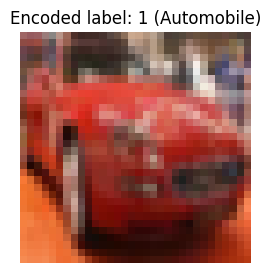

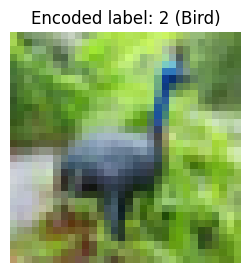

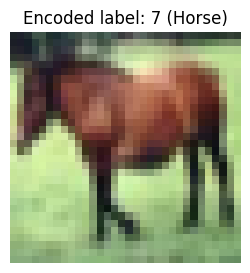

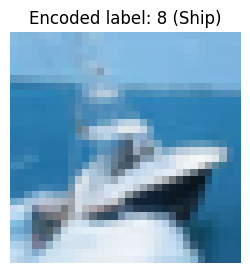

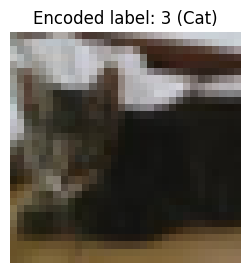

In [1]:
###importing modules, loading dataset, train-test split, one hot encoding and first visualization

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report



(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))

num_classes = 10
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']




plt.figure(figsize=(15, 15))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(Y_train[i])])  
    plt.axis('off')
plt.show()

plt.tight_layout()

class_dict = {0: "Airplane", 1: "Automobile", 2: "Bird", 3: "Cat", 4: "Deer", 5: "Dog", 6: "Frog", 7: "Horse", 8: "Ship", 9: "Truck"}

num=10



for i in range(num):
    plt.figure(figsize=(3, 3))
    plt.imshow(X_train[i])
    plt.title(f"Encoded label: {Y_train[i].argmax()} ({class_dict[Y_train[i].argmax()]})")
    plt.axis('off')
    plt.show()




In [2]:
# data conversion and normalization
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0



X_train
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

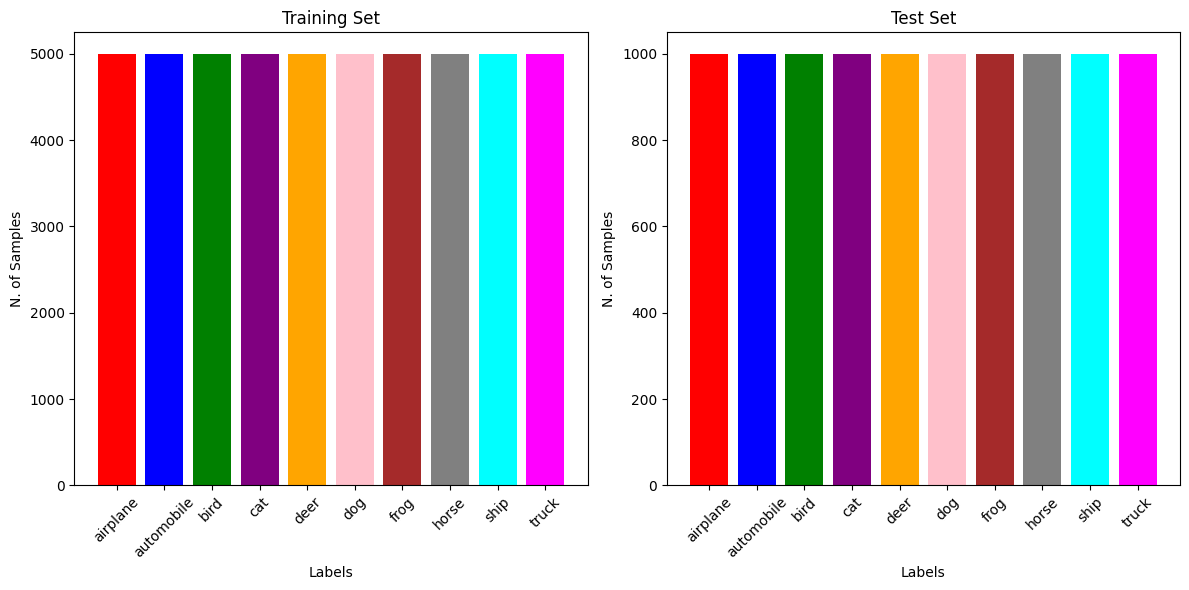

In [3]:
###data visualization of test and training samples 

train_class_counts = np.sum(Y_train, axis=0)
test_class_counts = np.sum(Y_test, axis=0)

colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta']


train_class_counts = np.sum(Y_train, axis=0)
test_class_counts = np.sum(Y_test, axis=0)

###plotting test and training set 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(num_classes), train_class_counts, color=colors)
plt.title('Training Set')
plt.xticks(range(num_classes), class_names, rotation=45)
plt.xlabel('Labels')
plt.ylabel('N. of Samples')


plt.subplot(1, 2, 2)
plt.bar(range(num_classes), test_class_counts, color=colors)
plt.title('Test Set')
plt.xticks(range(num_classes), class_names, rotation=45)
plt.xlabel('Labels')
plt.ylabel('N. of Samples')

plt.tight_layout()
plt.show()

In [4]:
###first model: one of the simplest (but too general) cnn model architecture

model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 128)               921728    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923914 (3.52 MB)
Trainable params: 923914 (3.52 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

Epoch 1/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4480 - accuracy: 0.4837 - val_loss: 1.2146 - val_accuracy: 0.5717
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1430 - accuracy: 0.5980 - val_loss: 1.1884 - val_accuracy: 0.5682
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0180 - accuracy: 0.6421 - val_loss: 1.0857 - val_accuracy: 0.6213
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9236 - accuracy: 0.6758 - val_loss: 1.0522 - val_accuracy: 0.6335
Epoch 5/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8488 - accuracy: 0.7024 - val_loss: 1.0436 - val_accuracy: 0.6365
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7819 - accuracy: 0.7262 - val_loss: 1.0731 - val_accuracy: 0.6316
Epoch 7/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7227 - accuracy: 0.7475 - val_loss: 1.1044 -

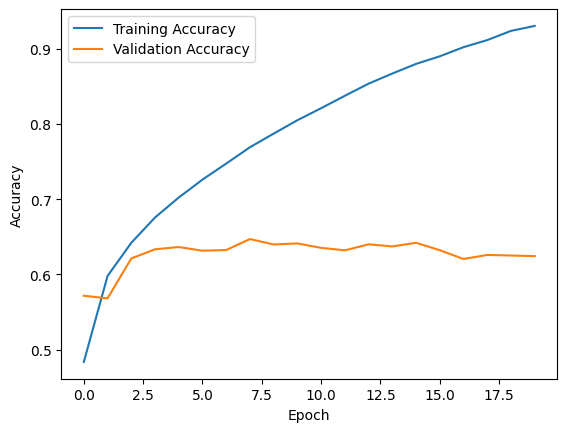

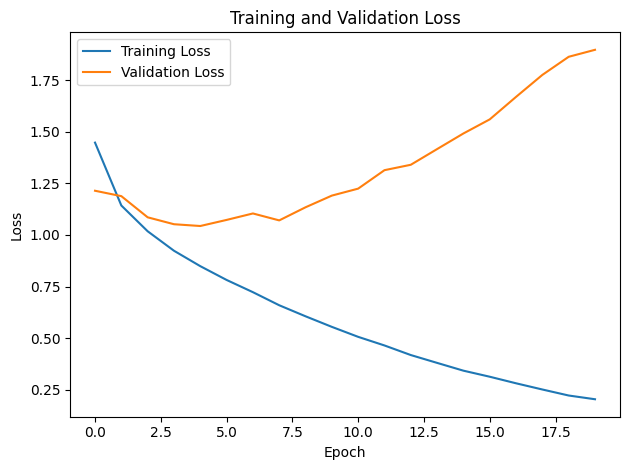

In [5]:
###training the model and plotting helper functions (accuracy and loss)

history = model1.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

# plot of training and validation (accuracy and loss)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()  
plt.show()

313/313 [==============================] - 1s 3ms/step


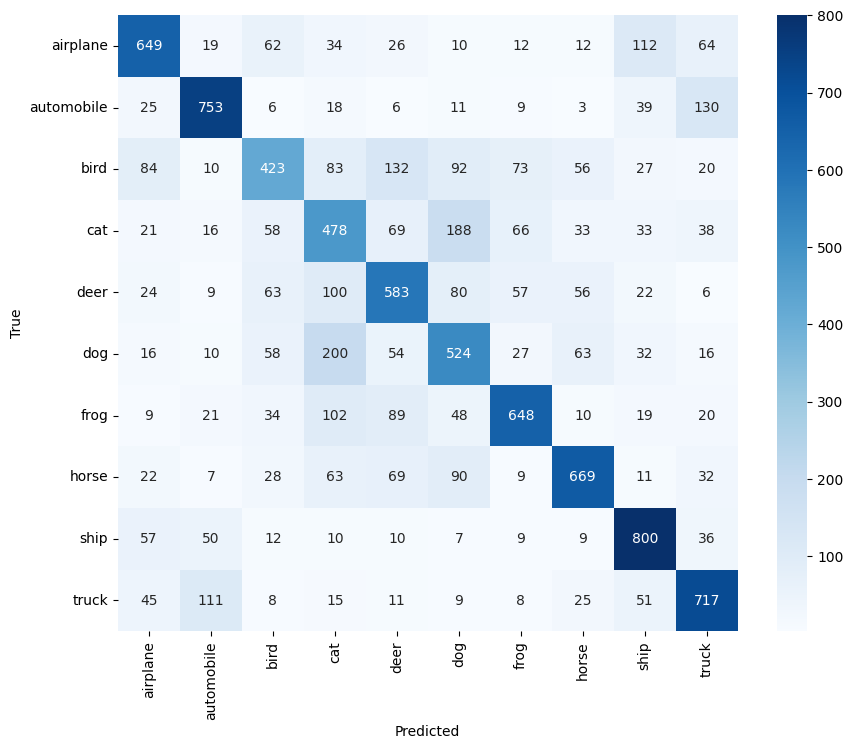

              precision    recall  f1-score   support

    airplane       0.68      0.65      0.66      1000
  automobile       0.75      0.75      0.75      1000
        bird       0.56      0.42      0.48      1000
         cat       0.43      0.48      0.45      1000
        deer       0.56      0.58      0.57      1000
         dog       0.49      0.52      0.51      1000
        frog       0.71      0.65      0.68      1000
       horse       0.71      0.67      0.69      1000
        ship       0.70      0.80      0.75      1000
       truck       0.66      0.72      0.69      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.62     10000
weighted avg       0.63      0.62      0.62     10000



In [6]:
###useful metrics for model evaluation



###confusion matrix
y_pred = model1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


###precision,recall, f1score
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


In [7]:
###trying to reduce overfit, new model architecture

model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
    
])


model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 128)        

Epoch 1/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.5716 - accuracy: 0.4237 - val_loss: 1.2670 - val_accuracy: 0.5407
Epoch 2/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1818 - accuracy: 0.5804 - val_loss: 1.1075 - val_accuracy: 0.6054
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0289 - accuracy: 0.6419 - val_loss: 0.9561 - val_accuracy: 0.6647
Epoch 4/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9332 - accuracy: 0.6737 - val_loss: 0.9303 - val_accuracy: 0.6772
Epoch 5/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8508 - accuracy: 0.7028 - val_loss: 0.8777 - val_accuracy: 0.6976
Epoch 6/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7906 - accuracy: 0.7234 - val_loss: 0.9011 - val_accuracy: 0.6871
Epoch 7/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7403 - accuracy: 0.7399 - val_loss: 0.8364 -

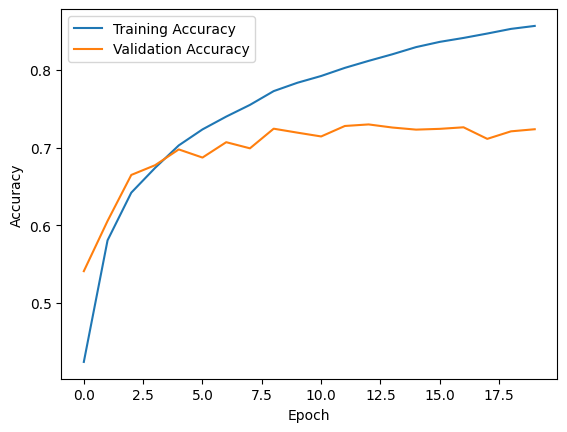

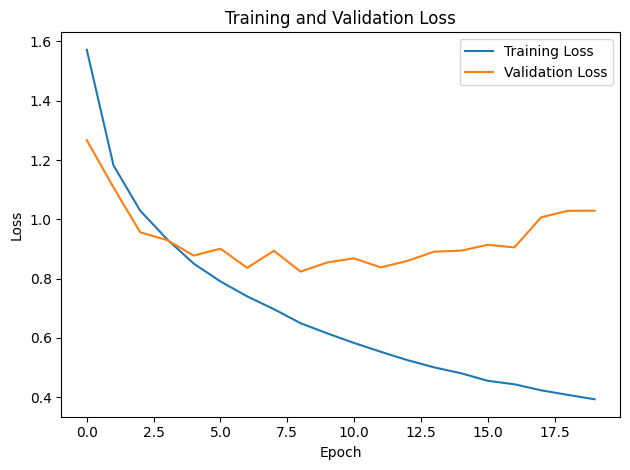

In [8]:
history = model2.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))



plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout() 
plt.show()

313/313 [==============================] - 1s 5ms/step


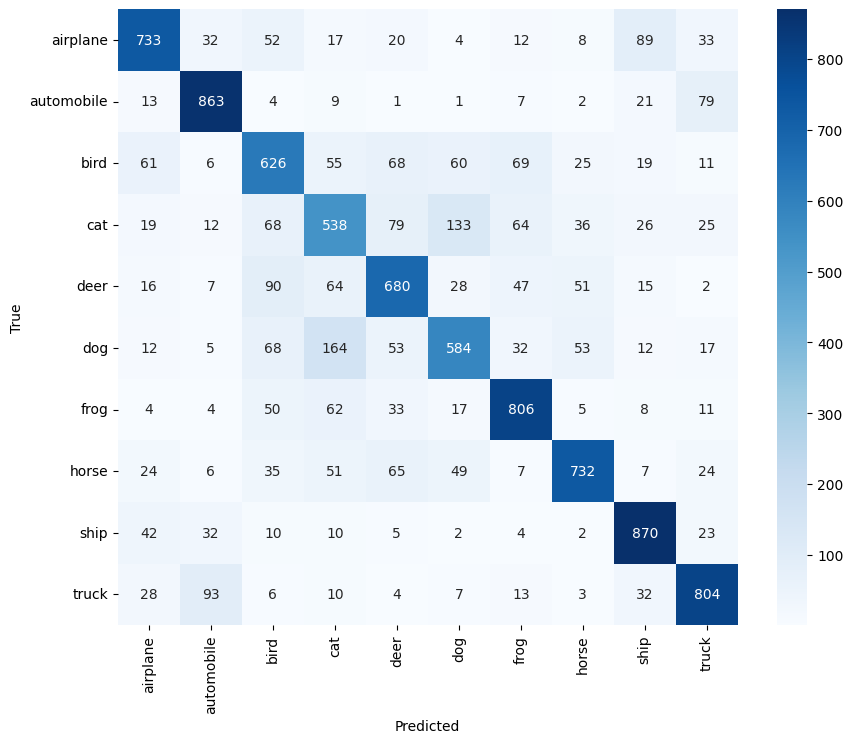

              precision    recall  f1-score   support

    airplane       0.77      0.73      0.75      1000
  automobile       0.81      0.86      0.84      1000
        bird       0.62      0.63      0.62      1000
         cat       0.55      0.54      0.54      1000
        deer       0.67      0.68      0.68      1000
         dog       0.66      0.58      0.62      1000
        frog       0.76      0.81      0.78      1000
       horse       0.80      0.73      0.76      1000
        ship       0.79      0.87      0.83      1000
       truck       0.78      0.80      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [9]:
###scores of model2

###confusion matrix


y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


###precision,recall, f1score
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


In [4]:
### applying batch normalization and more Dropout layers (trying to reduce again overfit and improve accuracy)

model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                        

Epoch 1/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.8444 - accuracy: 0.3466 - val_loss: 1.5951 - val_accuracy: 0.4446
Epoch 2/20
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4236 - accuracy: 0.4897 - val_loss: 1.4596 - val_accuracy: 0.4903
Epoch 3/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.2592 - accuracy: 0.5520 - val_loss: 1.3614 - val_accuracy: 0.5052
Epoch 4/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1501 - accuracy: 0.5963 - val_loss: 1.0510 - val_accuracy: 0.6280
Epoch 5/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0781 - accuracy: 0.6240 - val_loss: 1.3343 - val_accuracy: 0.5555
Epoch 6/20
1563/1563 [==============================] - 26s 16ms/step - loss: 1.0190 - accuracy: 0.6436 - val_loss: 0.9501 - val_accuracy: 0.6727
Epoch 7/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9683 - accuracy: 0.6614 - val_loss: 0.8928 -

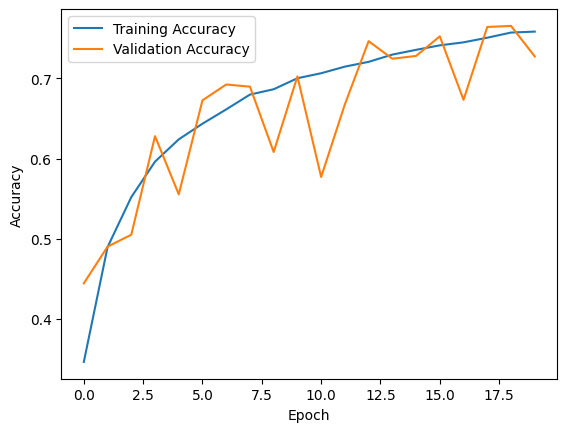

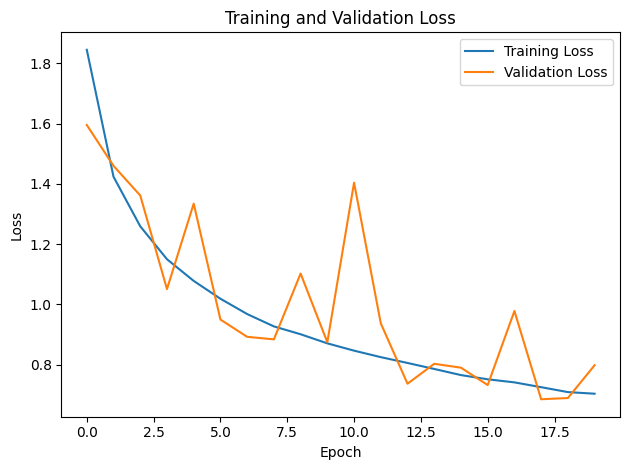

In [5]:
history = model3.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout() 
plt.show()

313/313 [==============================] - 2s 6ms/step


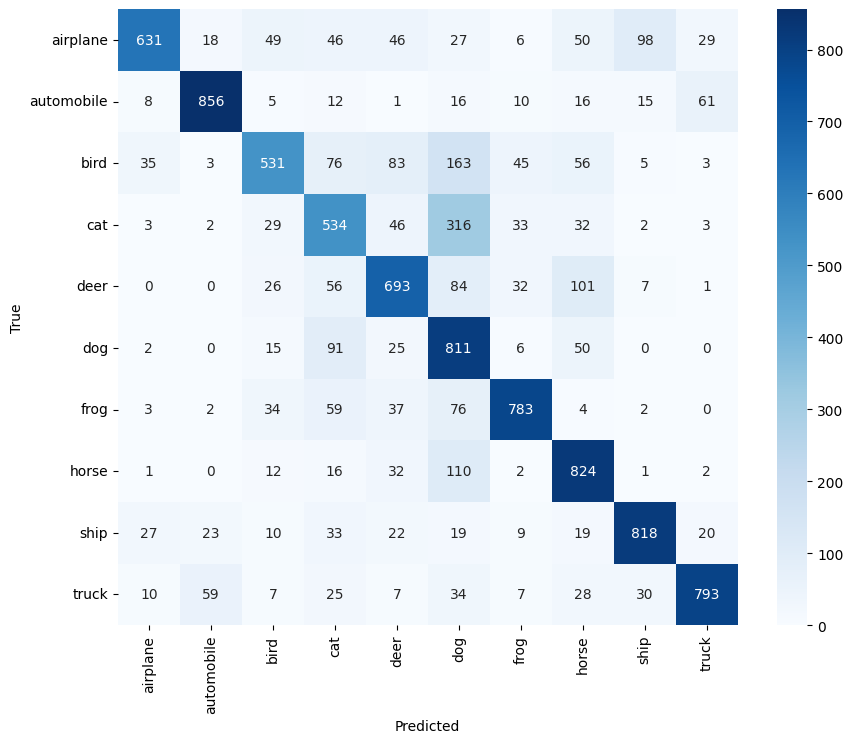

              precision    recall  f1-score   support

    airplane       0.88      0.63      0.73      1000
  automobile       0.89      0.86      0.87      1000
        bird       0.74      0.53      0.62      1000
         cat       0.56      0.53      0.55      1000
        deer       0.70      0.69      0.70      1000
         dog       0.49      0.81      0.61      1000
        frog       0.84      0.78      0.81      1000
       horse       0.70      0.82      0.76      1000
        ship       0.84      0.82      0.83      1000
       truck       0.87      0.79      0.83      1000

    accuracy                           0.73     10000
   macro avg       0.75      0.73      0.73     10000
weighted avg       0.75      0.73      0.73     10000



In [6]:
###first scores of model3


y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)


Epoch 21/40
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6837 - accuracy: 0.7632 - val_loss: 0.7032 - val_accuracy: 0.7550
Epoch 22/40
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6820 - accuracy: 0.7658 - val_loss: 0.7877 - val_accuracy: 0.7318
Epoch 23/40
1563/1563 [==============================] - 27s 18ms/step - loss: 0.6674 - accuracy: 0.7698 - val_loss: 0.7596 - val_accuracy: 0.7388
Epoch 24/40
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6607 - accuracy: 0.7707 - val_loss: 0.8023 - val_accuracy: 0.7261
Epoch 25/40
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6528 - accuracy: 0.7743 - val_loss: 0.7835 - val_accuracy: 0.7372
Epoch 26/40
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6458 - accuracy: 0.7763 - val_loss: 0.6971 - val_accuracy: 0.7579
Epoch 27/40
1563/1563 [==============================] - 28s 18ms/step - loss: 0.6364 - accuracy: 0.7818 - val_loss: 0

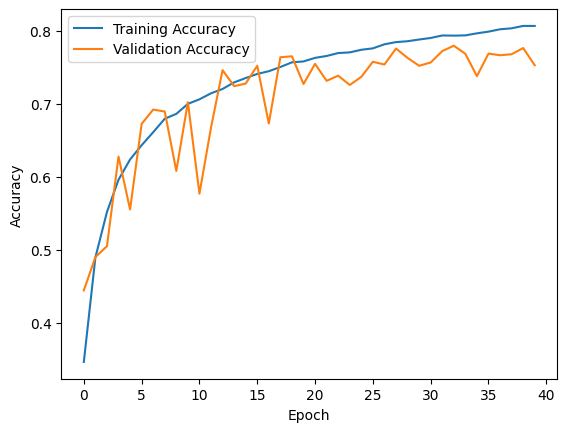

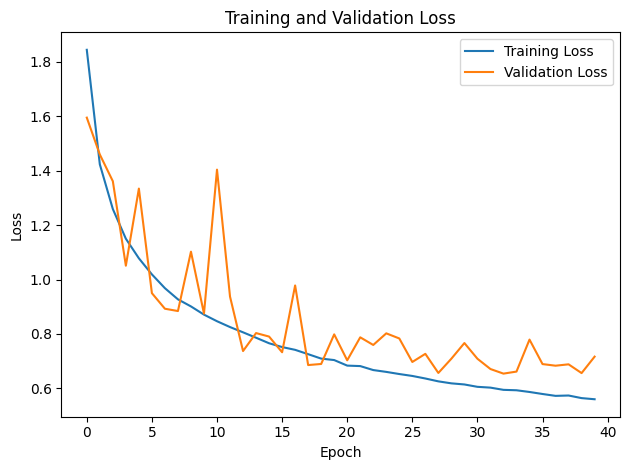

In [7]:
###seeing the scores and the graphs i think there's room for improvements

### adding 20 epochs training
history_additional = model3.fit(X_train, Y_train, epochs=40, validation_data=(X_test, Y_test),
                                 initial_epoch=history.epoch[-1] + 1)


combined_history = {}
for key in history.history:
    combined_history[key] = history.history[key] + history_additional.history[key]


plt.plot(combined_history['accuracy'], label='Training Accuracy')
plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(combined_history['loss'], label='Training Loss')
plt.plot(combined_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()  
plt.show()

313/313 [==============================] - 2s 6ms/step


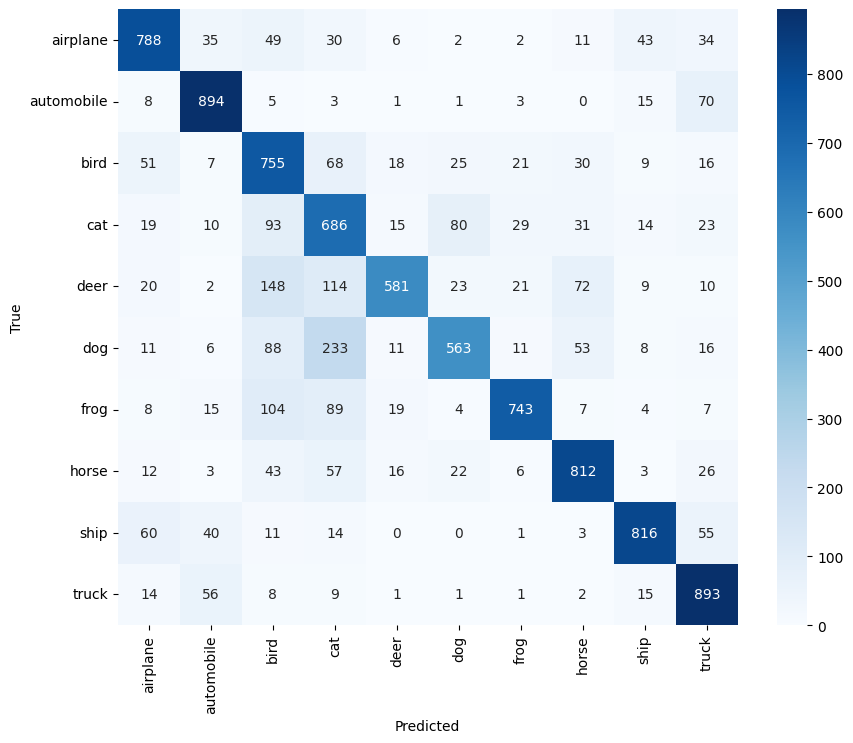

              precision    recall  f1-score   support

    airplane       0.80      0.79      0.79      1000
  automobile       0.84      0.89      0.86      1000
        bird       0.58      0.76      0.66      1000
         cat       0.53      0.69      0.60      1000
        deer       0.87      0.58      0.70      1000
         dog       0.78      0.56      0.65      1000
        frog       0.89      0.74      0.81      1000
       horse       0.80      0.81      0.80      1000
        ship       0.87      0.82      0.84      1000
       truck       0.78      0.89      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.77      0.75      0.75     10000
weighted avg       0.77      0.75      0.75     10000



In [8]:
### metrics to higlight improvements

y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)






Epoch 41/50
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5606 - accuracy: 0.8078 - val_loss: 0.6743 - val_accuracy: 0.7795
Epoch 42/50
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5583 - accuracy: 0.8080 - val_loss: 0.6950 - val_accuracy: 0.7669
Epoch 43/50
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5455 - accuracy: 0.8119 - val_loss: 0.6840 - val_accuracy: 0.7676
Epoch 44/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5430 - accuracy: 0.8130 - val_loss: 0.6928 - val_accuracy: 0.7698
Epoch 45/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5373 - accuracy: 0.8141 - val_loss: 0.6791 - val_accuracy: 0.7741
Epoch 46/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5341 - accuracy: 0.8125 - val_loss: 0.6531 - val_accuracy: 0.7803
Epoch 47/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.5355 - accuracy: 0.8149 - val_loss: 0

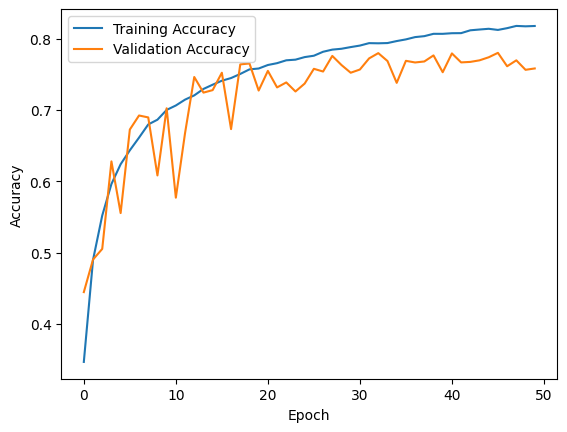

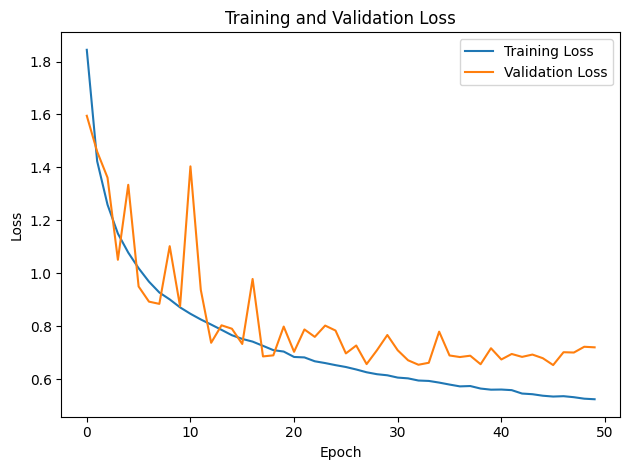

In [9]:
### adding 10 epochs of training (again)

history_additional2 = model3.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test),
                                 initial_epoch=history_additional.epoch[-1] + 1)


combined_history = {}
for key in history_additional.history:
    combined_history[key] =history.history[key]+ history_additional.history[key] + history_additional2.history[key]


plt.plot(combined_history['accuracy'], label='Training Accuracy')
plt.plot(combined_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(combined_history['loss'], label='Training Loss')
plt.plot(combined_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()  
plt.show()

313/313 [==============================] - 2s 6ms/step


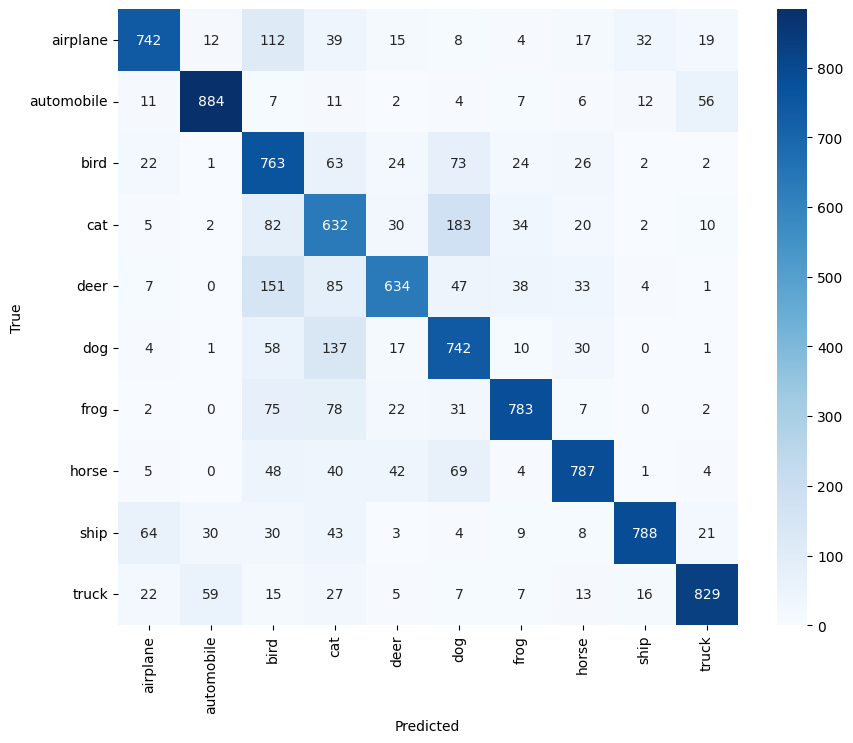

              precision    recall  f1-score   support

    airplane       0.84      0.74      0.79      1000
  automobile       0.89      0.88      0.89      1000
        bird       0.57      0.76      0.65      1000
         cat       0.55      0.63      0.59      1000
        deer       0.80      0.63      0.71      1000
         dog       0.64      0.74      0.68      1000
        frog       0.85      0.78      0.82      1000
       horse       0.83      0.79      0.81      1000
        ship       0.92      0.79      0.85      1000
       truck       0.88      0.83      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.78      0.76      0.76     10000
weighted avg       0.78      0.76      0.76     10000



In [10]:
y_pred = model3.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)

313/313 [==============================] - 2s 6ms/step


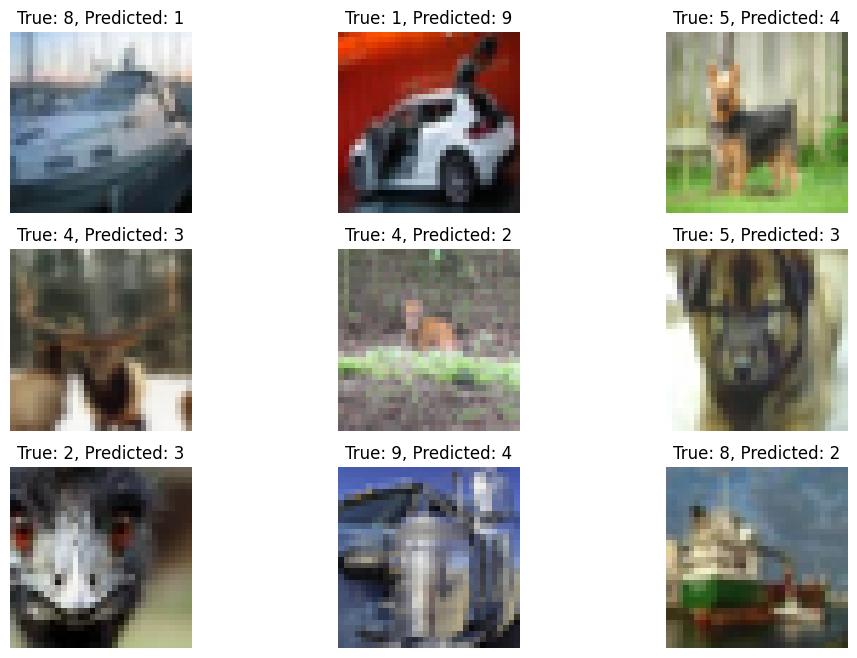

In [11]:
###plot some misclassified images


predictions = model3.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(Y_test, axis=1)


misclassified_indices = np.where(y_pred != y_true)[0]


plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:9]):  
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_true[idx]}, Predicted: {y_pred[idx]}")
    plt.axis('off')
plt.show()

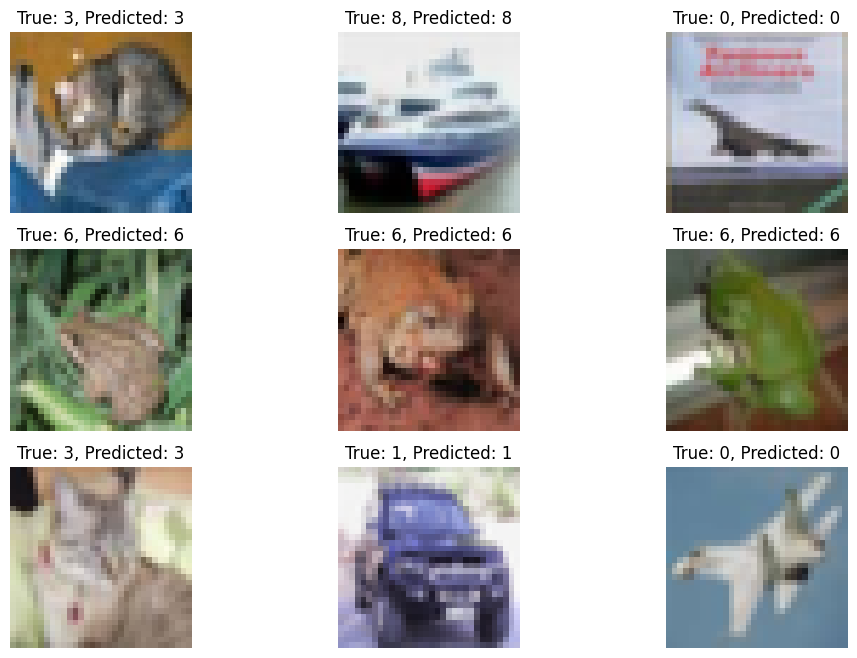

In [12]:
###plot some correctly classified images

classified_indices = np.where(y_pred == y_true)[0]


plt.figure(figsize=(12, 8))
for i, idx in enumerate(classified_indices[:9]):  
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_true[idx]}, Predicted: {y_pred[idx]}")
    plt.axis('off')
plt.show()

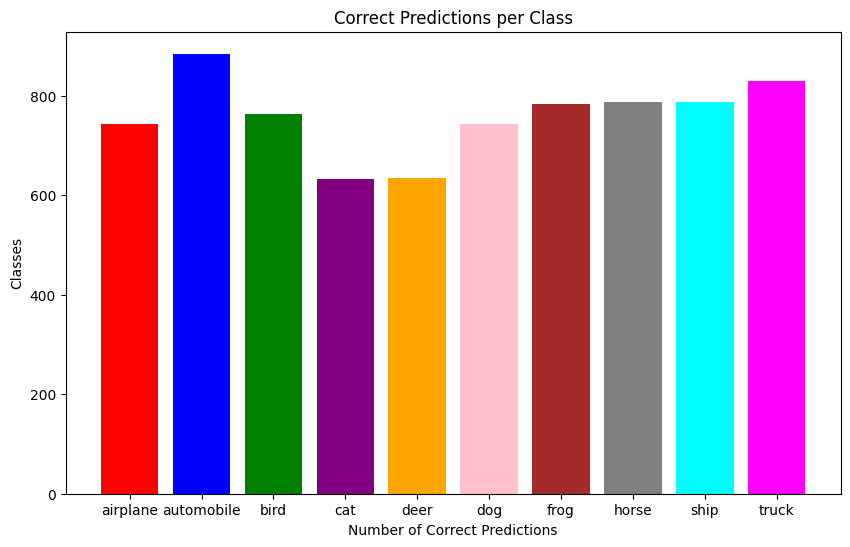

<Figure size 640x480 with 0 Axes>

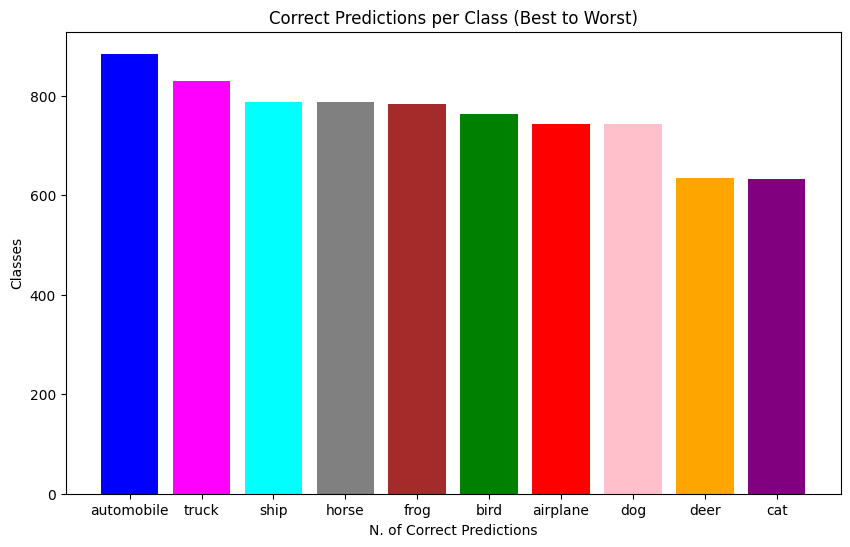

In [13]:
###data visualization of correct classifications

correct_predictions = np.zeros(10)
correctly_indices = np.where(y_pred == y_true)[0]


for class_index in range(10):
    class_indices = np.where(y_true[correctly_indices] == class_index)[0]
    correct_predictions[class_index] = len(class_indices)



###correctly classified images (in numbers)

plt.figure(figsize=(10, 6))
plt.bar(class_names, correct_predictions, color=colors)
plt.xlabel('Number of Correct Predictions')
plt.ylabel('Classes')
plt.title('Correct Predictions per Class')
 
plt.show()

plt.tight_layout()


###best to wors class (in numbers of prediction)

sorted_indices = np.argsort(-correct_predictions)
sorted_class_labels = [class_names[i] for i in sorted_indices]
sorted_correct_predictions = correct_predictions[sorted_indices]
sorted_colors = [colors[i] for i in sorted_indices]


plt.figure(figsize=(10, 6))
plt.bar(sorted_class_labels, sorted_correct_predictions, color=sorted_colors)
plt.xlabel('N. of Correct Predictions')
plt.ylabel('Classes')
plt.title('Correct Predictions per Class (Best to Worst)')

plt.show()








In [14]:
model3.save('best CNN model')

INFO:tensorflow:Assets written to: best CNN model\assets


INFO:tensorflow:Assets written to: best CNN model\assets
